# Imports and Loading the dataset

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from google.colab import drive


In [2]:
# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [3]:
# Read the file
dataset_file = pd.read_csv('/content/gDrive/MyDrive/Colab Notebooks/ProjetoFIA/ds_salaries.csv')
datascience_data = pd.DataFrame(dataset_file)

In [4]:
datascience_data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Data Preprocessing

In [5]:
# Cleaning my dataset
# Encode 'experience_level'
experience_level_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
datascience_data['experience_level'] = datascience_data['experience_level'].map(experience_level_mapping)

# Encode 'employment_type'
employment_type_mapping = {'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3}
datascience_data['employment_type'] = datascience_data['employment_type'].map(employment_type_mapping)

# Encode 'company_size'
company_size_mapping = {'S': 0, 'M': 1, 'L': 2}
datascience_data['company_size'] = datascience_data['company_size'].map(company_size_mapping)

# Encode 'salary_currency'
salary_currency_mapping = {'USD': 0, 'EUR': 1, 'GBP': 2}  # Extend as needed
datascience_data['salary_currency'] = datascience_data['salary_currency'].map(salary_currency_mapping)

# Encode 'employee_residence' and 'company_location'
# Use Label Encoding for country codes
le = LabelEncoder()
datascience_data['employee_residence'] = le.fit_transform(datascience_data['employee_residence'])
datascience_data['company_location'] = le.fit_transform(datascience_data['company_location'])

# Encode 'job_title' using Label Encoding (or One-Hot Encoding if preferred)
datascience_data['job_title'] = le.fit_transform(datascience_data['job_title'])

In [6]:
# Split into train and test samples
x = datascience_data.drop('experience_level', axis=1)
y = datascience_data['experience_level']

# Holdout 30% for testing - random_state=42 will result in a 100% accuracy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

# Decision Tree

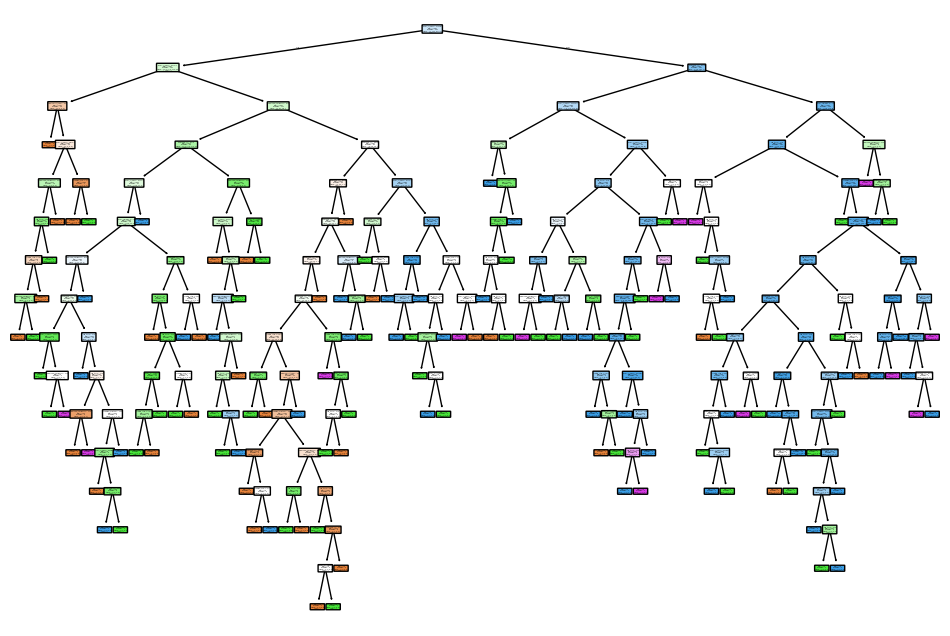

In [7]:
# Create a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=1234)
dt_classifier = dt_classifier.fit(X_train, y_train)

# Visualization of the tree model dt_classifier

plt.figure(figsize=(12,8))
tree.plot_tree(dt_classifier,
               feature_names=x.columns,
               class_names=[str(cls) for cls in y.unique()],
               filled=True,
               rounded=True)
plt.show()

Accuracy: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        26
           1       0.63      0.61      0.62        80
           2       0.59      0.70      0.64        71
           3       0.00      0.00      0.00         6

    accuracy                           0.57       183
   macro avg       0.39      0.39      0.38       183
weighted avg       0.55      0.57      0.56       183



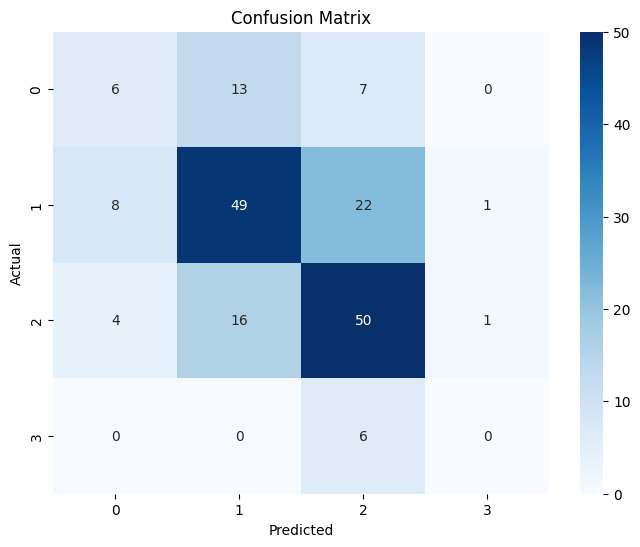

In [8]:
#Model Assessment
# Assess the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print(classification_report(y_test,y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forests

In [9]:
#Aqui começa o algoritmo de Random Forests
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

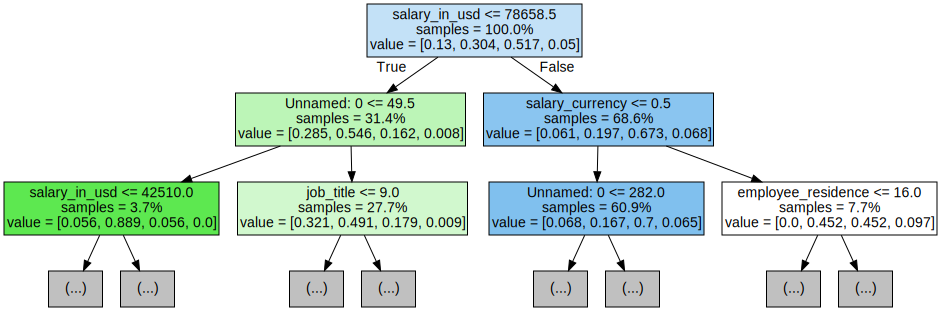

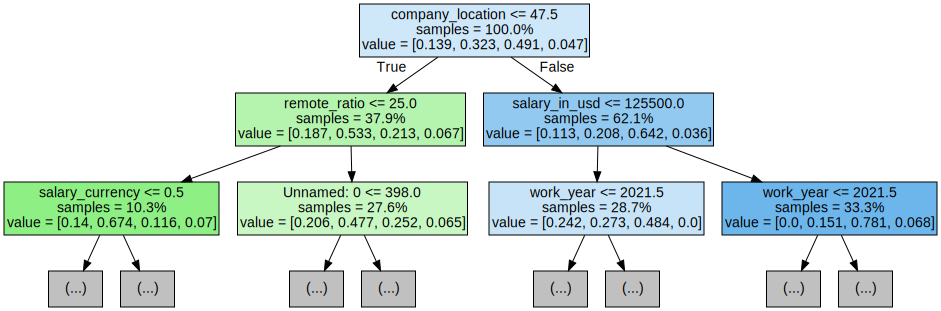

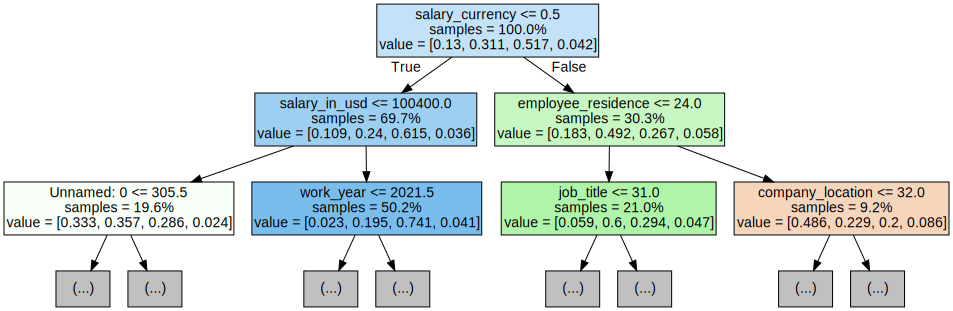

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [11]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6229508196721312


# K-Means

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [13]:
selected_features = ['salary_in_usd', 'remote_ratio', 'experience_level', 'employment_type', 'company_size']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(datascience_data[selected_features])
scaled_data = pd.DataFrame(scaled_data, columns=selected_features)
scaled_data

,salary_in_usd,remote_ratio,experience_level,employment_type,company_size
0,-0.457904,-1.743615,-0.512162,-0.021875,1.240346
1,2.083282,-1.743615,0.761946,-0.021875,-1.820182
2,-0.046177,-0.514377,0.761946,-0.021875,-0.289918
3,-1.301826,-1.743615,-0.512162,-0.021875,-1.820182
4,0.531774,-0.514377,0.761946,-0.021875,1.240346
...,...,...,...,...,...
602,0.588192,0.714862,0.761946,-0.021875,-0.289918
603,0.193263,0.714862,0.761946,-0.021875,-0.289918
604,0.235577,-1.743615,0.761946,-0.021875,-0.289918
605,0.531774,0.714862,0.761946,-0.021875,-0.289918


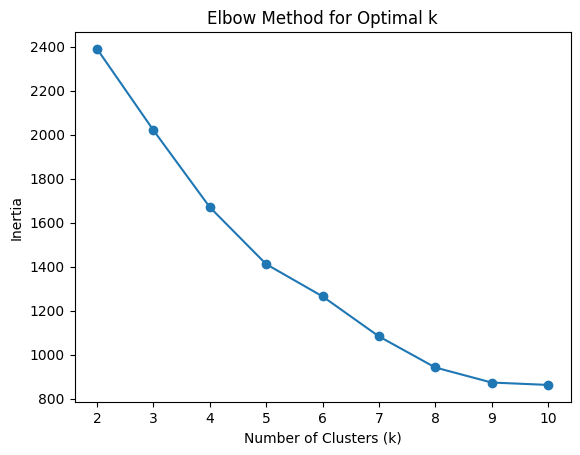

In [14]:
# Test k values from 2 to 10
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(scaled_data, kmeans.labels_))

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
#AHHHHHHHHHHH meio dificil mas decidi o 5

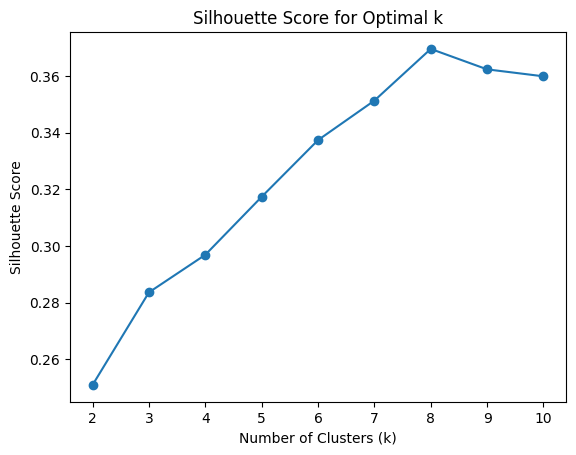

In [15]:
# Silhouette
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()
#AHHHHHH after taking a look at the silhouette score I can see the correct k value is 8 very cool comparison

In [16]:
# Perform K-Means clustering with k=8
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_data)  # scaled_data is the preprocessed DataFrame or NumPy array

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add cluster labels to the original data
datascience_data['cluster'] = clusters

# Check the first few rows to verify
print(datascience_data.head())
print(datascience_data.groupby('cluster').mean())

   Unnamed: 0  work_year  experience_level  employment_type  job_title  \
0           0       2020                 1                1         22   
1           1       2020                 2                1         41   
2           2       2020                 2                1          7   
3           3       2020                 1                1         47   
4           4       2020                 2                1         38   

   salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0   70000              1.0          79833                  14             0   
1  260000              0.0         260000                  32             0   
2   85000              2.0         109024                  20            50   
3   20000              0.0          20000                  23             0   
4  150000              0.0         150000                  55            50   

   company_location  company_size  cluster  
0                12             2  

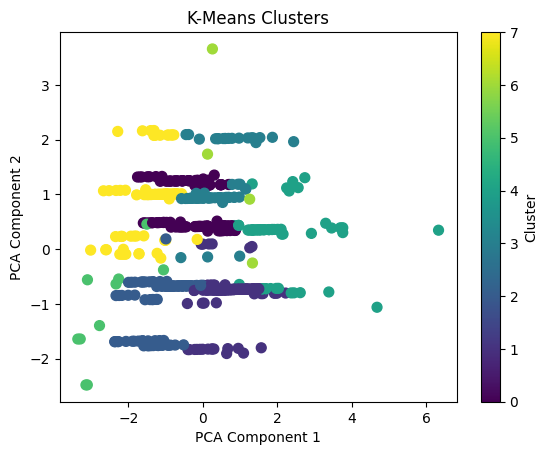

In [28]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters')
plt.colorbar(label='Cluster')
plt.show()

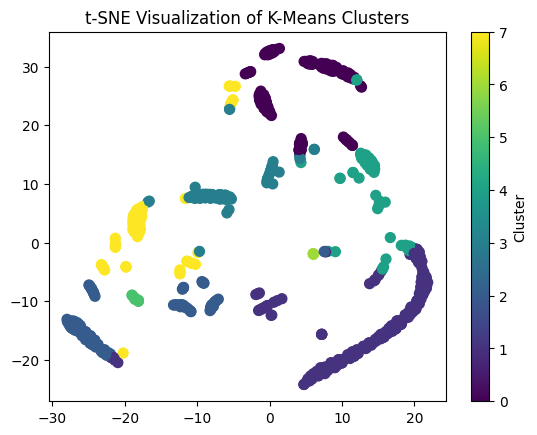

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.colorbar(label='Cluster')
plt.show()

# Apriori

The objective of applying the Apriori algorithm is to uncover frequent patterns in product purchases and user behavior. Specifically, we aim to identify products frequently bought together, understand the influence of discounts and ratings on purchases, and generate insights into user preferences to optimize product recommendations and marketing strategies.

In [37]:
# Read the file
dataset_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProjetoFIA/amazon.csv')
amazon_data = pd.DataFrame(dataset_file)
amazon_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [38]:
# 1. Drop irrelevant columns
columns_to_drop = ['img_link', 'product_link', 'about_product', 'user_name', 'review_id',
                   'review_title', 'review_content', 'discount_percentage']  # Adjust as needed
amazon_data = amazon_data.drop(columns=columns_to_drop, axis=1)
amazon_data = amazon_data.dropna()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Group
ds_grouped = amazon_data.groupby(['user_id', 'product_name'], as_index=False).agg({'rating_count':'sum'})
# Display the first few rows of the grouped dataset
print(ds_grouped.head(1))

                                             user_id  \
0  AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...   

                                        product_name rating_count  
0  Universal Remote Control for All Sony TV for A...        2,640  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Ensure 'rating_count' is numeric (just in case it contains non-numeric data)
ds_grouped['rating_count'] = pd.to_numeric(ds_grouped['rating_count'], errors='coerce')

ds_pivot = pd.pivot(data=ds_grouped, index='user_id', columns='product_name', values='rating_count').fillna(0).applymap(lambda x: True if x > 0 else False)
ds_pivot.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-51a7665adae7>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ds_pivot = pd.pivot(data=ds_grouped, index='user_id', columns='product_name', values='rating_count').fillna(0).applymap(lambda x: True if x > 0 else False)


product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)","4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
user_id,,,,,,,,,,,,,,,,,,,,,
"AHZFKWGDBRQKNMNQ4ZPL52OZBRKA,AGBEFVJFOQIRF7C7KY5VN6XO7JEA,AGN47LODJXDWX6WWSS5JJLKP2HWQ,AGJRVBQJIVB445HIWTFCZOI37IQA,AHCNUZM2XGWJXQHPWYVZMS5CAEMA,AFQICBBGIA6ED2FXXYEVEVKDFOWQ,AELILYZUYXGJOFN2P7KT7OEUBM2Q,AEJHZ5W2C7AYFISGPX7WSDVSIYEQ",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"AHZJHJWFZLYD64GVP4PXVI2F4LXA,AEUCRZPOISXKHXMCZUH6BXTUXUWA,AFL2ICS3EEESPGYLFF7OTVYMLVJA,AG63J3CFIT6RYX32RHHYWRZ2WKKA,AE6EGCFBVJIZEZ4XPPIY3PES2SDQ,AHUZG5YJCM4UWL66ALQ744FD3OOA,AEIKB2XA64MPG7BBXRG4DT57QKPQ,AF4ECPZRARF7SK2GDSBPTINVA2CA",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"AHZNSNBVKQR4OGJAQHE4DCDA4YHA,AFBW6COTZXGHQMWVDUOSXVUCCIHQ,AFFRU7QVLXG4LNG6JKQKJ23KBA2A,AF5E74KNXXYBJVMG7HUYXNRNYY3A,AF4F4SKVD2UU7ZBJFZNNBK7ORIGA,AF3IVRFFILSUOKAXKRZBFBDRF7MQ,AF23WB7B2XKLYCA3KXEGKSBWYKOA,AHAJNAQDV3BHN5AYLY3LOWFJCS6A",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQ

In [58]:
from mlxtend.frequent_patterns import apriori, association_rules
# Get the rules
min_support=0.0000001
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
freq_itemsets
# Get the number of itemsets in freq_itemsets
num_itemsets = len(freq_itemsets)
print(f'Number of itemsets: {num_itemsets}')
freq_itemsets.head()

# Get the rules
rules = association_rules(freq_itemsets, metric="support", min_threshold=min_support, num_itemsets= num_itemsets)
rules.sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of itemsets: 315


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
1,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
18,"(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
17,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
16,"(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
15,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
14,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
13,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
12,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
11,(Zoul USB C 60W Fast Charging 3A 6ft/2M Long T...,(Zoul USB Type C Fast Charging 3A Nylon Braide...,0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0


In [61]:
# List the 10 rules with higher confidence
rules.sort_values('confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
1,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
18,"(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
17,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
16,"(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
15,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Light Green, 4GB RAM, 64GB...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
14,"(Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB ...","(Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB S...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
13,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
12,"(boAt Newly Launched Wave Electra with 1.81"" H...","(boAt Newly Launched Wave Electra with 1.81"" H...",0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
11,(Zoul USB C 60W Fast Charging 3A 6ft/2M Long T...,(Zoul USB Type C Fast Charging 3A Nylon Braide...,0.000839,0.000839,0.000839,1.0,1192.0,1.0,0.000838,inf,1.0,1.0,1.0,1.0
